In [131]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf

# import plotnine as p9

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [132]:
"""
Ticker  Fund Name                           Issuer                          AUM         Expense Ratio       3-Mo TR     Segment
TSLL	Direxion Daily TSLA Bull 2X Shares	Rafferty Asset Management	    $7.86B	    0.95%	            78.9%	    Leveraged Equity: U.S. Automobile Manufacturers
""";

In [133]:
# tickers = ['TSLL', 'TSLA']
# ydata = yf.Tickers(tickers).download(period="max", auto_adjust=True, interval="1h")['Close']

In [134]:
# ydata.head()

In [135]:
# data = (   # put data in long form
#     ydata
#     .dropna()
#     .stack(future_stack=True)  # Removed the level parameter since there's only one level
#     .reset_index()
#     .rename(columns={0: 'Close'})  # Rename the stacked column to 'Close'
#     [['Datetime', 'Ticker', 'Close']]  # Note: column is 'Datetime', not 'Date', because of interval="1h"
#     .sort_values(by=['Datetime', 'Ticker'])
# )

# data.head(5)

In [136]:
# # time period is the min datetime of data df, converted to string in format YYYY-MM-DD
# time_period = data['Datetime'].min()

# # keep only date from time_period
# time_period = time_period.date().strftime('%Y-%m-%d')

# print(time_period)

In [137]:
# # download historical data from Yahoo Finance to csv, file name data_<tickers>_2002-07-30_D.csv
# data.to_csv('data_TSLL_TSLA_' + time_period + '_D.csv', index=False)

In [138]:
time_period = "2023-11-10"

In [139]:
# read data from csv
data = pd.read_csv('data_TSLL_TSLA_' + time_period + '_D.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  6960 non-null   datetime64[ns, UTC]
 1   Ticker    6960 non-null   object             
 2   Close     6960 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 163.3+ KB
None
                   Datetime Ticker       Close
0 2023-11-10 14:30:00+00:00   TSLA  207.099899
1 2023-11-10 14:30:00+00:00   TSLL   11.400000
2 2023-11-10 15:30:00+00:00   TSLA  210.429993
3 2023-11-10 15:30:00+00:00   TSLL   11.687200
4 2023-11-10 16:30:00+00:00   TSLA  212.649994


In [140]:
# rename Datetime to Date, to keep consistent with previous notebooks
data = data.rename(columns={'Datetime': 'Date'})

In [141]:
# Add year-month label (end of month date)

# Convert Date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'ym' representing the last day of each month
data['ym'] = data['Date'] + pd.offsets.MonthEnd(0)

# keep only date for column ym
data['ym'] = data['ym'].dt.date

data.head()

,Date,Ticker,Close,ym
0,2023-11-10 14:30:00+00:00,TSLA,207.099899,2023-11-30
1,2023-11-10 14:30:00+00:00,TSLL,11.400000,2023-11-30
2,2023-11-10 15:30:00+00:00,TSLA,210.429993,2023-11-30
3,2023-11-10 15:30:00+00:00,TSLL,11.687200,2023-11-30
4,2023-11-10 16:30:00+00:00,TSLA,212.649994,2023-11-30


In [142]:
"""
df starts from 2023-11-10

In the next cell, this will be marked as td = 1, but actually it td = 12.

Due to this, in the next cell, I introduced a filter to keep data from a full month, 2024-10-01 onwards.
""";

In [143]:
# # Original code:

# # Create trading-day counter for each Ticker and month

# # Sort data to ensure correct order
# data = data.sort_values(['Ticker', 'Date']).copy()

# # Keep data from October 2023 onwards - make timestamp timezone-aware
# data = data[data['Date'] >= pd.Timestamp(2023, 12, 1, tz='UTC')]

# # Count trading days within each (Ticker, ym) group
# data['td'] = data.groupby(['Ticker', 'ym']).cumcount() + 1

# # # add data['td'] column where td is the day of the month for each Ticker
# # data['td'] = data['Date'].dt.day

# data.head()

In [144]:
# Revised code:

# Create trading-day counter for each Ticker and month

# Sort data to ensure correct order
data = data.sort_values(['Ticker', 'Date']).copy()

# # Keep data from October 2023 onwards - make timestamp timezone-aware
# data = data[data['Date'] >= pd.Timestamp(2023, 12, 1, tz='UTC')]

# # Count trading days within each (Ticker, ym) group
# data['td'] = data.groupby(['Ticker', 'ym']).cumcount() + 1

# add data['td'] column where td is the day of the month for each Ticker
data['td'] = data['Date'].dt.day

data.head()

,Date,Ticker,Close,ym,td
0,2023-11-10 14:30:00+00:00,TSLA,207.099899,2023-11-30,10
2,2023-11-10 15:30:00+00:00,TSLA,210.429993,2023-11-30,10
4,2023-11-10 16:30:00+00:00,TSLA,212.649994,2023-11-30,10
6,2023-11-10 17:30:00+00:00,TSLA,213.229996,2023-11-30,10
8,2023-11-10 18:30:00+00:00,TSLA,214.809998,2023-11-30,10


In [145]:
#  Calculate daily simple returns

# Calculate percentage change of 'Close' within each ticker
data['ret'] = data.groupby('Ticker')['Close'].pct_change()

# fill na values in ret with 0
data['ret'] = data['ret'].fillna(0)

data.head()

,Date,Ticker,Close,ym,td,ret
0,2023-11-10 14:30:00+00:00,TSLA,207.099899,2023-11-30,10,0.000000
2,2023-11-10 15:30:00+00:00,TSLA,210.429993,2023-11-30,10,0.016080
4,2023-11-10 16:30:00+00:00,TSLA,212.649994,2023-11-30,10,0.010550
6,2023-11-10 17:30:00+00:00,TSLA,213.229996,2023-11-30,10,0.002727
8,2023-11-10 18:30:00+00:00,TSLA,214.809998,2023-11-30,10,0.007410


In [146]:
# Filter dates and keep only needed columns

# Keep only useful columns
data = data[['Date', 'ym', 'Ticker', 'Close', 'ret', 'td']]

data.head()

,Date,ym,Ticker,Close,ret,td
0,2023-11-10 14:30:00+00:00,2023-11-30,TSLA,207.099899,0.000000,10
2,2023-11-10 15:30:00+00:00,2023-11-30,TSLA,210.429993,0.016080,10
4,2023-11-10 16:30:00+00:00,2023-11-30,TSLA,212.649994,0.010550,10
6,2023-11-10 17:30:00+00:00,2023-11-30,TSLA,213.229996,0.002727,10
8,2023-11-10 18:30:00+00:00,2023-11-30,TSLA,214.809998,0.007410,10


In [147]:
# Create start/end/month flags and conditional returns

# # Original code:
# N = 15  # number of days for start of month
# M = 5   # number of days for next start of month

# Revised code:
N = 20  # number of days for start of month (calendar days)
M = 7   # number of days for next start of month (calendar days)

# Flags: 1 if condition true, 0 otherwise
data['som_flag'] = (data['td'] <= N).astype(int)
data['eom_flag'] = (data['td'] > N).astype(int)
data['nsm_flag'] = (data['td'] <= M).astype(int)

# Conditional returns (return only within flag period)
data['ret_som'] = data['ret'] * data['som_flag']
data['ret_eom'] = data['ret'] * data['eom_flag']
data['ret_nsm'] = data['ret'] * data['nsm_flag']

data_ = data.copy()

data.head()

,Date,ym,Ticker,Close,ret,td,som_flag,eom_flag,nsm_flag,ret_som,ret_eom,ret_nsm
0,2023-11-10 14:30:00+00:00,2023-11-30,TSLA,207.099899,0.000000,10,1,0,0,0.000000,0.0,0.0
2,2023-11-10 15:30:00+00:00,2023-11-30,TSLA,210.429993,0.016080,10,1,0,0,0.016080,0.0,0.0
4,2023-11-10 16:30:00+00:00,2023-11-30,TSLA,212.649994,0.010550,10,1,0,0,0.010550,0.0,0.0
6,2023-11-10 17:30:00+00:00,2023-11-30,TSLA,213.229996,0.002727,10,1,0,0,0.002727,0.0,0.0
8,2023-11-10 18:30:00+00:00,2023-11-30,TSLA,214.809998,0.007410,10,1,0,0,0.007410,0.0,0.0


In [148]:
# Keep only relevant return columns
data_flags = data[['Date', 'ym', 'Ticker', 'ret_som', 'ret_eom', 'ret_nsm']]

data_flags.head()

,Date,ym,Ticker,ret_som,ret_eom,ret_nsm
0,2023-11-10 14:30:00+00:00,2023-11-30,TSLA,0.000000,0.0,0.0
2,2023-11-10 15:30:00+00:00,2023-11-30,TSLA,0.016080,0.0,0.0
4,2023-11-10 16:30:00+00:00,2023-11-30,TSLA,0.010550,0.0,0.0
6,2023-11-10 17:30:00+00:00,2023-11-30,TSLA,0.002727,0.0,0.0
8,2023-11-10 18:30:00+00:00,2023-11-30,TSLA,0.007410,0.0,0.0


In [149]:
# Pivot to wide format (one column per Ticker)

# Create wide format table: columns for each Ticker and return type
pivoted = data_flags.pivot(index=['Date', 'ym'], columns='Ticker')

# Flatten multi-level column names (e.g. ret_som_TSLL)
pivoted.columns = [f"{col[1]}_{col[0]}" for col in pivoted.columns]

pivoted = pivoted.reset_index()

# count of nan values in each column
nan = pivoted.isna().sum()
print(nan)

# fill missing values with 0
pivoted = pivoted.fillna(0)

pivoted.head()

Date            0
ym              0
TSLA_ret_som    0
TSLL_ret_som    0
TSLA_ret_eom    0
TSLL_ret_eom    0
TSLA_ret_nsm    0
TSLL_ret_nsm    0
dtype: int64


,Date,ym,TSLA_ret_som,TSLL_ret_som,TSLA_ret_eom,TSLL_ret_eom,TSLA_ret_nsm,TSLL_ret_nsm
0,2023-11-10 14:30:00+00:00,2023-11-30,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2023-11-10 15:30:00+00:00,2023-11-30,0.016080,0.025193,0.0,0.0,0.0,0.0
2,2023-11-10 16:30:00+00:00,2023-11-30,0.010550,0.015598,0.0,0.0,0.0,0.0
3,2023-11-10 17:30:00+00:00,2023-11-30,0.002727,0.003412,0.0,0.0,0.0,0.0
4,2023-11-10 18:30:00+00:00,2023-11-30,0.007410,0.012561,0.0,0.0,0.0,0.0


In [150]:
# create a copy of data to be later used for the backtest analysis (8 PL streams in the backtesting)
backtest_data = pivoted.copy()

In [151]:
# Compute relative returns and aggregate monthly

# Calculate combined and relative returns
pivoted['TSLL_ret'] = pivoted['TSLL_ret_som'] + pivoted['TSLL_ret_eom']
pivoted['TSLL_TSLA_som'] = pivoted['TSLL_ret_som'] - pivoted['TSLA_ret_som']
pivoted['TSLL_TSLA_eom'] = pivoted['TSLL_ret_eom'] - pivoted['TSLA_ret_eom']
pivoted['TSLL_TSLA_nsm'] = pivoted['TSLL_ret_nsm'] - pivoted['TSLA_ret_nsm']

# Add TSLA returns to pivoted
pivoted['TSLA_ret'] = pivoted['TSLA_ret_som'] + pivoted['TSLA_ret_eom']

# Select relevant columns
returns = pivoted[['ym', 'TSLL_ret', 'TSLA_ret', 'TSLL_TSLA_som', 'TSLL_TSLA_eom', 'TSLL_TSLA_nsm']]

# Aggregate monthly returns using compounding formula
monthly = returns.groupby('ym').apply(lambda x: (1 + x).prod() - 1)

monthly.head()

,TSLL_ret,TSLA_ret,TSLL_TSLA_som,TSLL_TSLA_eom,TSLL_TSLA_nsm
ym,,,,,
2023-11-30,0.237719,0.158813,0.065289,0.007363,0.000000
2023-12-31,0.017002,0.035418,-0.005572,-0.007072,0.005773
2024-01-31,-0.356421,-0.246569,-0.078096,-0.062224,-0.023637
2024-02-29,0.107165,0.077609,0.015188,0.019215,0.001564
2024-03-31,-0.205868,-0.128674,-0.078583,-0.000532,-0.059791


In [152]:
monthly.tail(5)

,TSLL_ret,TSLA_ret,TSLL_TSLA_som,TSLL_TSLA_eom,TSLL_TSLA_nsm
ym,,,,,
2025-07-31,-0.094412,-0.029690,0.027632,-0.066105,-0.076961
2025-08-31,0.149135,0.083650,0.046612,0.024804,0.041383
2025-09-30,0.717657,0.331078,0.268616,0.036781,0.048660
2025-10-31,0.020133,0.026949,-0.005544,0.018269,-0.032055
2025-11-30,-0.123984,-0.059450,-0.064102,0.000000,-0.064102


In [153]:
return_data = monthly.copy()

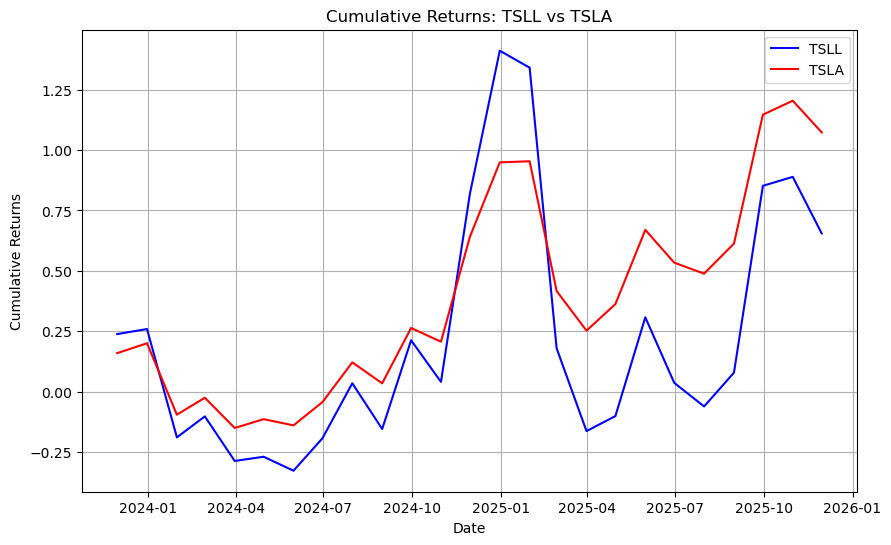

In [154]:
# calculate cumulative returns for TSLL_ret and TSLA_ret
monthly['TSLL_cumret'] = (1 + monthly['TSLL_ret']).cumprod() - 1
monthly['TSLA_cumret'] = (1 + monthly['TSLA_ret']).cumprod() - 1

# plot TSLL_ret vs TSLA_ret to compare their performance
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['TSLL_cumret'], label='TSLL', color='blue')
plt.plot(monthly.index, monthly['TSLA_cumret'], label='TSLA', color='red')
plt.title('Cumulative Returns: TSLL vs TSLA')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

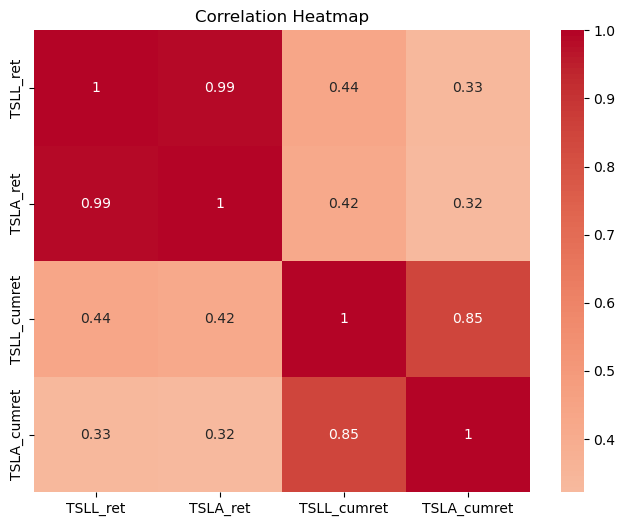

In [155]:
# plot correlation heatmap of TSLL_ret, TSLA_ret, TSLL_cumret, TSLA_cumret
plt.figure(figsize=(8, 6))
sns.heatmap(monthly[['TSLL_ret', 'TSLA_ret', 'TSLL_cumret', 'TSLA_cumret']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

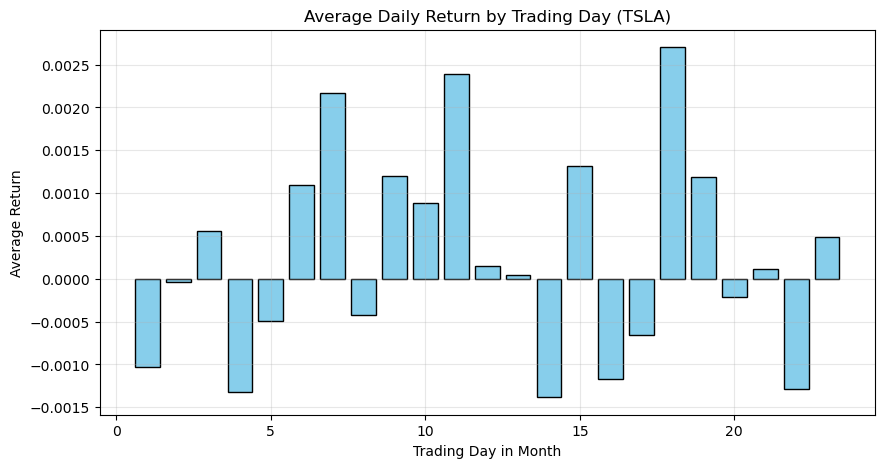

,td,ret
18,19,0.001187
19,20,-0.000218
20,21,0.000111
21,22,-0.001291
22,23,0.000487


In [156]:
# Average daily returns of TSLA and TSLL
# Keep only rows where the ticker is 'TSLA' 
TSLA = data[data['Ticker'] == 'TSLA'].copy()

# Add 'ym' column as the end of the month for each date 
TSLA['ym'] = TSLA['Date'] + pd.offsets.MonthEnd(0)

# Calculate daily return based on the Close price 
TSLA['ret'] = TSLA['Close'].pct_change()

TSLA_filtered = TSLA.copy()

# For each month, number the days starting from 1 
TSLA_filtered['td'] = TSLA_filtered.groupby('ym').cumcount() + 1

# Group by the trading day number and take the mean of returns 
avg_daily_returns = TSLA_filtered.groupby('td')['ret'].mean().reset_index()

# Plot average daily returns using matplotlib 
plt.figure(figsize=(10, 5))
plt.bar(avg_daily_returns['td'], avg_daily_returns['ret'], color='skyblue', edgecolor='black')

# Add labels and title 
plt.title("Average Daily Return by Trading Day (TSLA)")
plt.xlabel("Trading Day in Month")
plt.ylabel("Average Return")
plt.grid(alpha=0.3)

plt.show()

# Show the last few rows of the data for reference 
avg_daily_returns.tail()

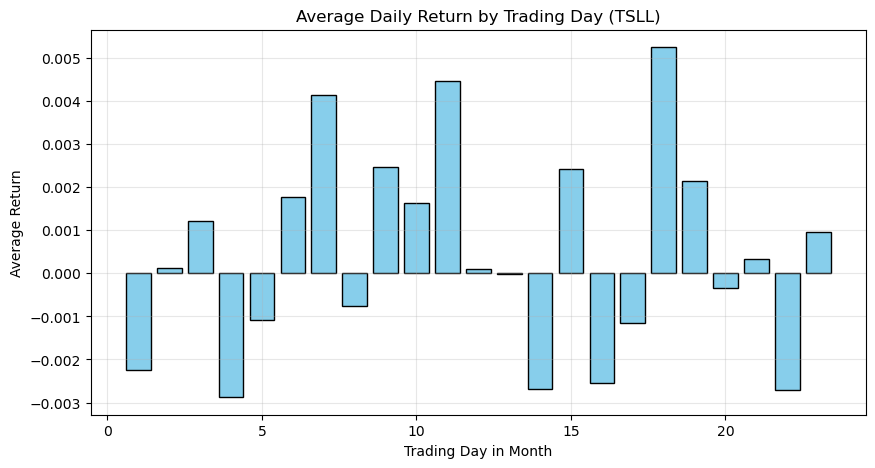

,td,ret
18,19,0.002144
19,20,-0.000348
20,21,0.000324
21,22,-0.002716
22,23,0.000953


In [157]:
# Keep only rows where the ticker is 'TSLL'
TSLL = data[data['Ticker'] == 'TSLL'].copy()

# Add 'ym' column as the end of the month for each date
TSLL['ym'] = TSLL['Date'] + pd.offsets.MonthEnd(0)

# Calculate daily return based on the Close price
TSLL['ret'] = TSLL['Close'].pct_change()

# # Keep only data after ...
# TSLL_filtered = TSLL[TSLL['Date'] >= pd.Timestamp(2023, 12, 1, tz='UTC')].copy()

TSLL_filtered = TSLL.copy()

# For each month, number the days starting from 1
TSLL_filtered['td'] = TSLL_filtered.groupby('ym').cumcount() + 1

# Group by the trading day number and take the mean of returns
avg_daily_returns_TSLL = TSLL_filtered.groupby('td')['ret'].mean().reset_index()

# Plot average daily returns using matplotlib
plt.figure(figsize=(10, 5))
plt.bar(avg_daily_returns_TSLL['td'], avg_daily_returns_TSLL['ret'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Average Daily Return by Trading Day (TSLL)")
plt.xlabel("Trading Day in Month")
plt.ylabel("Average Return")
plt.grid(alpha=0.3)

plt.show()

# Show the last few rows of the data for reference
avg_daily_returns_TSLL.tail()

In [158]:
# drop ret	td	som_flag	eom_flag	nsm_flag	ret_som	ret_eom	ret_nsm from data_
data_ = data_.drop(columns=['ret', 'td', 'som_flag', 'eom_flag', 'nsm_flag', 'ret_som', 'ret_eom', 'ret_nsm'])

# pivot data_.Ticker
pivoted_data_ = data_.pivot(index='Date', columns='Ticker', values='Close')

In [159]:
# split DatetimeIndex index into Date and Time columns
pivoted_data_ = pivoted_data_.reset_index()

# Store the original datetime before converting
original_datetime = pivoted_data_['Date']

# Extract date and time from the original datetime column
pivoted_data_['Date'] = original_datetime.dt.date
pivoted_data_['Time'] = original_datetime.dt.time

# add pct_change columns for each Ticker
pivoted_data_['TSLL_pct_change'] = pivoted_data_['TSLL'].pct_change()
pivoted_data_['TSLA_pct_change'] = pivoted_data_['TSLA'].pct_change()

# fill na values with 0
pivoted_data_['TSLL_pct_change'] = pivoted_data_['TSLL_pct_change'].fillna(0)
pivoted_data_['TSLA_pct_change'] = pivoted_data_['TSLA_pct_change'].fillna(0)

pivoted_data_.head()

Ticker,Date,TSLA,TSLL,Time,TSLL_pct_change,TSLA_pct_change
0,2023-11-10,207.099899,11.4000,14:30:00,0.000000,0.000000
1,2023-11-10,210.429993,11.6872,15:30:00,0.025193,0.016080
2,2023-11-10,212.649994,11.8695,16:30:00,0.015598,0.010550
3,2023-11-10,213.229996,11.9100,17:30:00,0.003412,0.002727
4,2023-11-10,214.809998,12.0596,18:30:00,0.012561,0.007410


In [160]:
# Group by the hour and take the mean of returns 
avg_daily_returns = pivoted_data_.groupby('Time')[['TSLL_pct_change', 'TSLA_pct_change']].mean().reset_index()

avg_daily_returns.head(10)

Ticker,Time,TSLL_pct_change,TSLA_pct_change
0,13:30:00,0.004468,0.002399
1,14:30:00,0.000734,0.000419
2,15:30:00,0.000657,0.000321
3,16:30:00,-0.000542,-0.000246
4,17:30:00,0.000713,0.000376
5,18:30:00,-0.001123,-0.000508
6,19:30:00,0.000187,0.000144
7,20:30:00,0.000501,0.000271


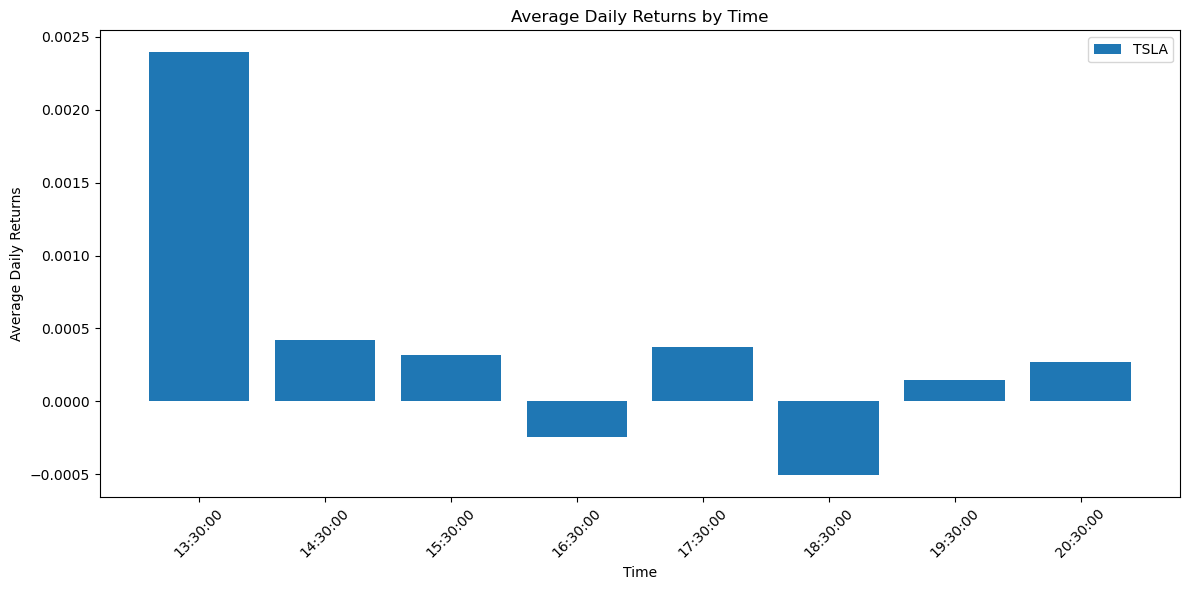

In [161]:
# plot avg_daily_returns by Time, using matplotlib
plt.figure(figsize=(12, 6))

# Convert time to string for plotting
time_strings = avg_daily_returns['Time'].astype(str)

# plt.bar(time_strings, avg_daily_returns['TSLL_pct_change'], label='TSLL')
plt.bar(time_strings, avg_daily_returns['TSLA_pct_change'], label='TSLA')
plt.xlabel('Time')
plt.ylabel('Average Daily Returns')
plt.title('Average Daily Returns by Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

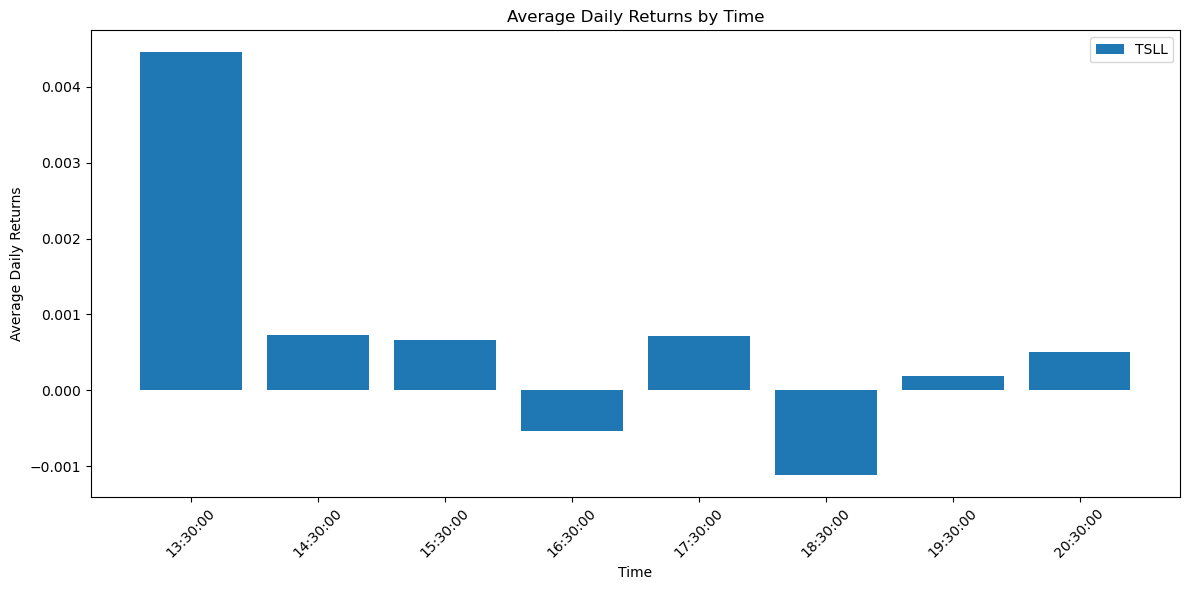

In [162]:
# plot avg_daily_returns by Time, using matplotlib
plt.figure(figsize=(12, 6))

# Convert time to string for plotting
time_strings = avg_daily_returns['Time'].astype(str)

plt.bar(time_strings, avg_daily_returns['TSLL_pct_change'], label='TSLL')
# plt.bar(time_strings, avg_daily_returns['TSLA_pct_change'], label='TSLA')
plt.xlabel('Time')
plt.ylabel('Average Daily Returns')
plt.title('Average Daily Returns by Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

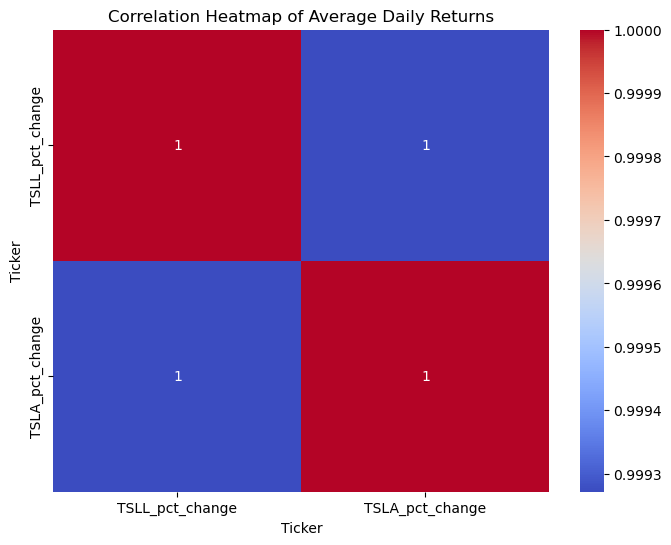

In [163]:
# correlation heatmap of avg_daily_returns
plt.figure(figsize=(8, 6))
sns.heatmap(avg_daily_returns[['TSLL_pct_change', 'TSLA_pct_change']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Average Daily Returns')
plt.show()